<a href="https://colab.research.google.com/github/chilakalakavya566/Big-Mart-Sales-Prediction/blob/master/Heart_Failure_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [2]:
!pip install dataprep

     |████████████████████████████████| 3.7 MB 5.0 MB/s 
     |████████████████████████████████| 366 kB 33.2 MB/s 
     |████████████████████████████████| 1.5 MB 32.1 MB/s 
     |████████████████████████████████| 1.1 MB 40.0 MB/s 
     |████████████████████████████████| 1.0 MB 37.6 MB/s 
     |████████████████████████████████| 133 kB 39.4 MB/s 
     |████████████████████████████████| 110 kB 18.1 MB/s 
     |████████████████████████████████| 95 kB 2.4 MB/s 
     |████████████████████████████████| 965 kB 35.9 MB/s 
     |████████████████████████████████| 943 kB 44.4 MB/s 
     |████████████████████████████████| 749 kB 45.2 MB/s 
     |████████████████████████████████| 10.9 MB 41.1 MB/s 
     |████████████████████████████████| 144 kB 64.0 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 70.6 MB/s 
     |████████████████████████████████| 134 kB 73.4 MB/s 
     |████████████████████████████████| 289 kB 45.0 MB/s 
     |████████████

In [3]:
import pandas as pd
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from dataprep.eda import plot

In [ ]:
filename = 'processed.cleveland.data'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
heart_data_1 = np.array(x)
print(heart_data_1.shape)

(303, 14)


In [ ]:
heart_data_1

array([['63.0', '1.0', '1.0', ..., '0.0', '6.0', '0'],
       ['67.0', '1.0', '4.0', ..., '3.0', '3.0', '2'],
       ['67.0', '1.0', '4.0', ..., '2.0', '7.0', '1'],
       ...,
       ['57.0', '1.0', '4.0', ..., '1.0', '7.0', '3'],
       ['57.0', '0.0', '2.0', ..., '1.0', '3.0', '1'],
       ['38.0', '1.0', '3.0', ..., '?', '3.0', '0']], dtype='<U5')

In [ ]:
filename = 'processed.hungarian.data'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
heart_data_2 = np.array(x)
print(heart_data_2.shape)

(294, 14)


In [ ]:
filename = 'processed.switzerland.data'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
heart_data_3 = np.array(x)
print(heart_data_3.shape)

(123, 14)


In [ ]:
filename = 'processed.va.data'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
heart_data_4 = np.array(x)
print(heart_data_4.shape)

(200, 14)


In [4]:
data=pd.read_csv("heart.csv")

In [5]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
y = data['target'].copy()
#y = np.array(y, dtype='float32')
x = data.drop('target', axis=1).copy()
x = np.array(x, dtype='float32')

In [7]:
print(x)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [8]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [9]:
std_scaler = StandardScaler()

In [10]:
(trainX, testX, trainY, testY) = train_test_split(x,
    y, test_size=0.3, random_state=101)

trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [11]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1.0, 10.0, 100.0, 1000.0],
              'gamma':[1,0.1,0.01]}

In [12]:
model = svm.SVC()
grid_model = GridSearchCV(model, parameters, verbose=2)

In [13]:
grid_model.fit(trainX, trainY)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': [1, 0.1, 0.01], 'kernel': ('linear', 'rbf')},
             verbose=2)

In [14]:
svc_best_param = grid_model.best_params_
print("Best params for SVM:", svc_best_param)

Best params for SVM: {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [15]:
predict = grid_model.predict(testX)
print(classification_report(testY,predict))
print(confusion_matrix(testY, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       148
           1       1.00      0.96      0.98       160

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

[[148   0]
 [  7 153]]


In [16]:
svc_accuracy_score = accuracy_score(testY, predict)
print("Best accuracy for SVM:", svc_accuracy_score)

Best accuracy for SVM: 0.9772727272727273


In [17]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [18]:
heart_data2=data.drop(['age','trestbps','chol','fbs','oldpeak'],axis=1)

In [19]:
y=heart_data2['target']
x=heart_data2.drop('target',axis=1)

In [20]:
print(x)

      sex  cp  restecg  thalach  exang  slope  ca  thal
0       1   0        1      168      0      2   2     3
1       1   0        0      155      1      0   0     3
2       1   0        1      125      1      0   0     3
3       1   0        1      161      0      2   1     3
4       0   0        1      106      0      1   3     2
...   ...  ..      ...      ...    ...    ...  ..   ...
1020    1   1        1      164      1      2   0     2
1021    1   0        0      141      1      1   1     3
1022    1   0        0      118      1      1   1     2
1023    0   0        0      159      0      2   0     2
1024    1   0        1      113      0      1   1     3

[1025 rows x 8 columns]


In [21]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [22]:
std_scaler = StandardScaler()

In [23]:
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.3, random_state=101)
trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [24]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1.0, 10.0, 100.0, 1000.0],'gamma':[1,0.1,0.01]}
model = svm.SVC()
grid_model = GridSearchCV(model, parameters, verbose=2)
grid_model.fit(trainX, trainY)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': [1, 0.1, 0.01], 'kernel': ('linear', 'rbf')},
             verbose=2)

In [25]:
svc_best_param = grid_model.best_params_
print("Best params for SVM:", svc_best_param)

Best params for SVM: {'C': 1000.0, 'gamma': 1, 'kernel': 'rbf'}


In [26]:
predict = grid_model.predict(testX)
print(classification_report(testY,predict))
print(confusion_matrix(testY, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

[[148   0]
 [  1 159]]


In [27]:
svc_accuracy_score = accuracy_score(testY, predict)
print("Best accuracy for SVM:", svc_accuracy_score)

Best accuracy for SVM: 0.9967532467532467


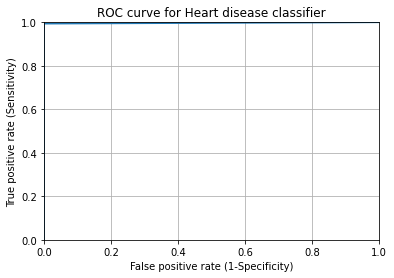

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, predict)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [30]:
import sklearn
sklearn.metrics.roc_auc_score(testY,predict)

0.996875

In [35]:
c_data=pd.read_csv("heart_cleveland_upload.csv")

In [37]:
c_data['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [39]:
y = c_data['condition'].copy()
#y = np.array(y, dtype='float32')
x = c_data.drop('condition', axis=1).copy()
x = np.array(x, dtype='float32')

In [40]:
std_scaler = StandardScaler()

In [41]:
(trainX, testX, trainY, testY) = train_test_split(x,
    y, test_size=0.3, random_state=101)

trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [42]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1.0, 10.0, 100.0, 1000.0],
              'gamma':[1,0.1,0.01]}